In [205]:
import pandas as pd
from sklearn.metrics import f1_score

In [2]:
# Uncomment the following line (even on google colab)
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Created wheel for pandas-profiling: filename=pandas_profiling-3.3.1-py2.py3-none-any.whl size=310090 sha256=98d5987627e5237eb42dc31422e7b168fba1c7966c45ca99812f5a772fa8a628
  Stored in directory: C:\Users\ANANTHU\AppData\Local\Temp\pip-ephem-wheel-cache-ite5l01n\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=3d7e724d8ede8c7f185c01768ef732dea3929121e3b00f7396bb2a2bd0e9750e
  Stored in directory: c:\users\ananthu\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built pandas-profiling htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled pa

In [3]:
from pandas_profiling import ProfileReport

In [137]:
# write your own file location
df=pd.read_csv('medical_appointment.csv')

TO DO:
1. Change catagorical features to numeric.
2. Drop the columns with low variance (Use Sklearn's Feature Selection or find feature importance by training a Decision Tree). 
3. Balance the data set.
4. Compare different ML models including (AdBoost and XGBoost) using F1-score.
5. Use Grid Search Cross Validation to find the hyperparameters.

## EDA

In [138]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [139]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [141]:
df.shape

(110527, 14)

In [142]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [146]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.tz_localize(None)
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.tz_localize(None)

In [147]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [148]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [149]:
 # Creating a variable to find date difference 
df['date_diff']=df['AppointmentDay']-df['ScheduledDay']
df['date_diff'] = df['date_diff'].apply(lambda x: x.days)
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.tz_localize(None)+pd.Timedelta('1d')-pd.Timedelta('1s')

In [150]:
df['date_diff']

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Name: date_diff, Length: 110527, dtype: int64

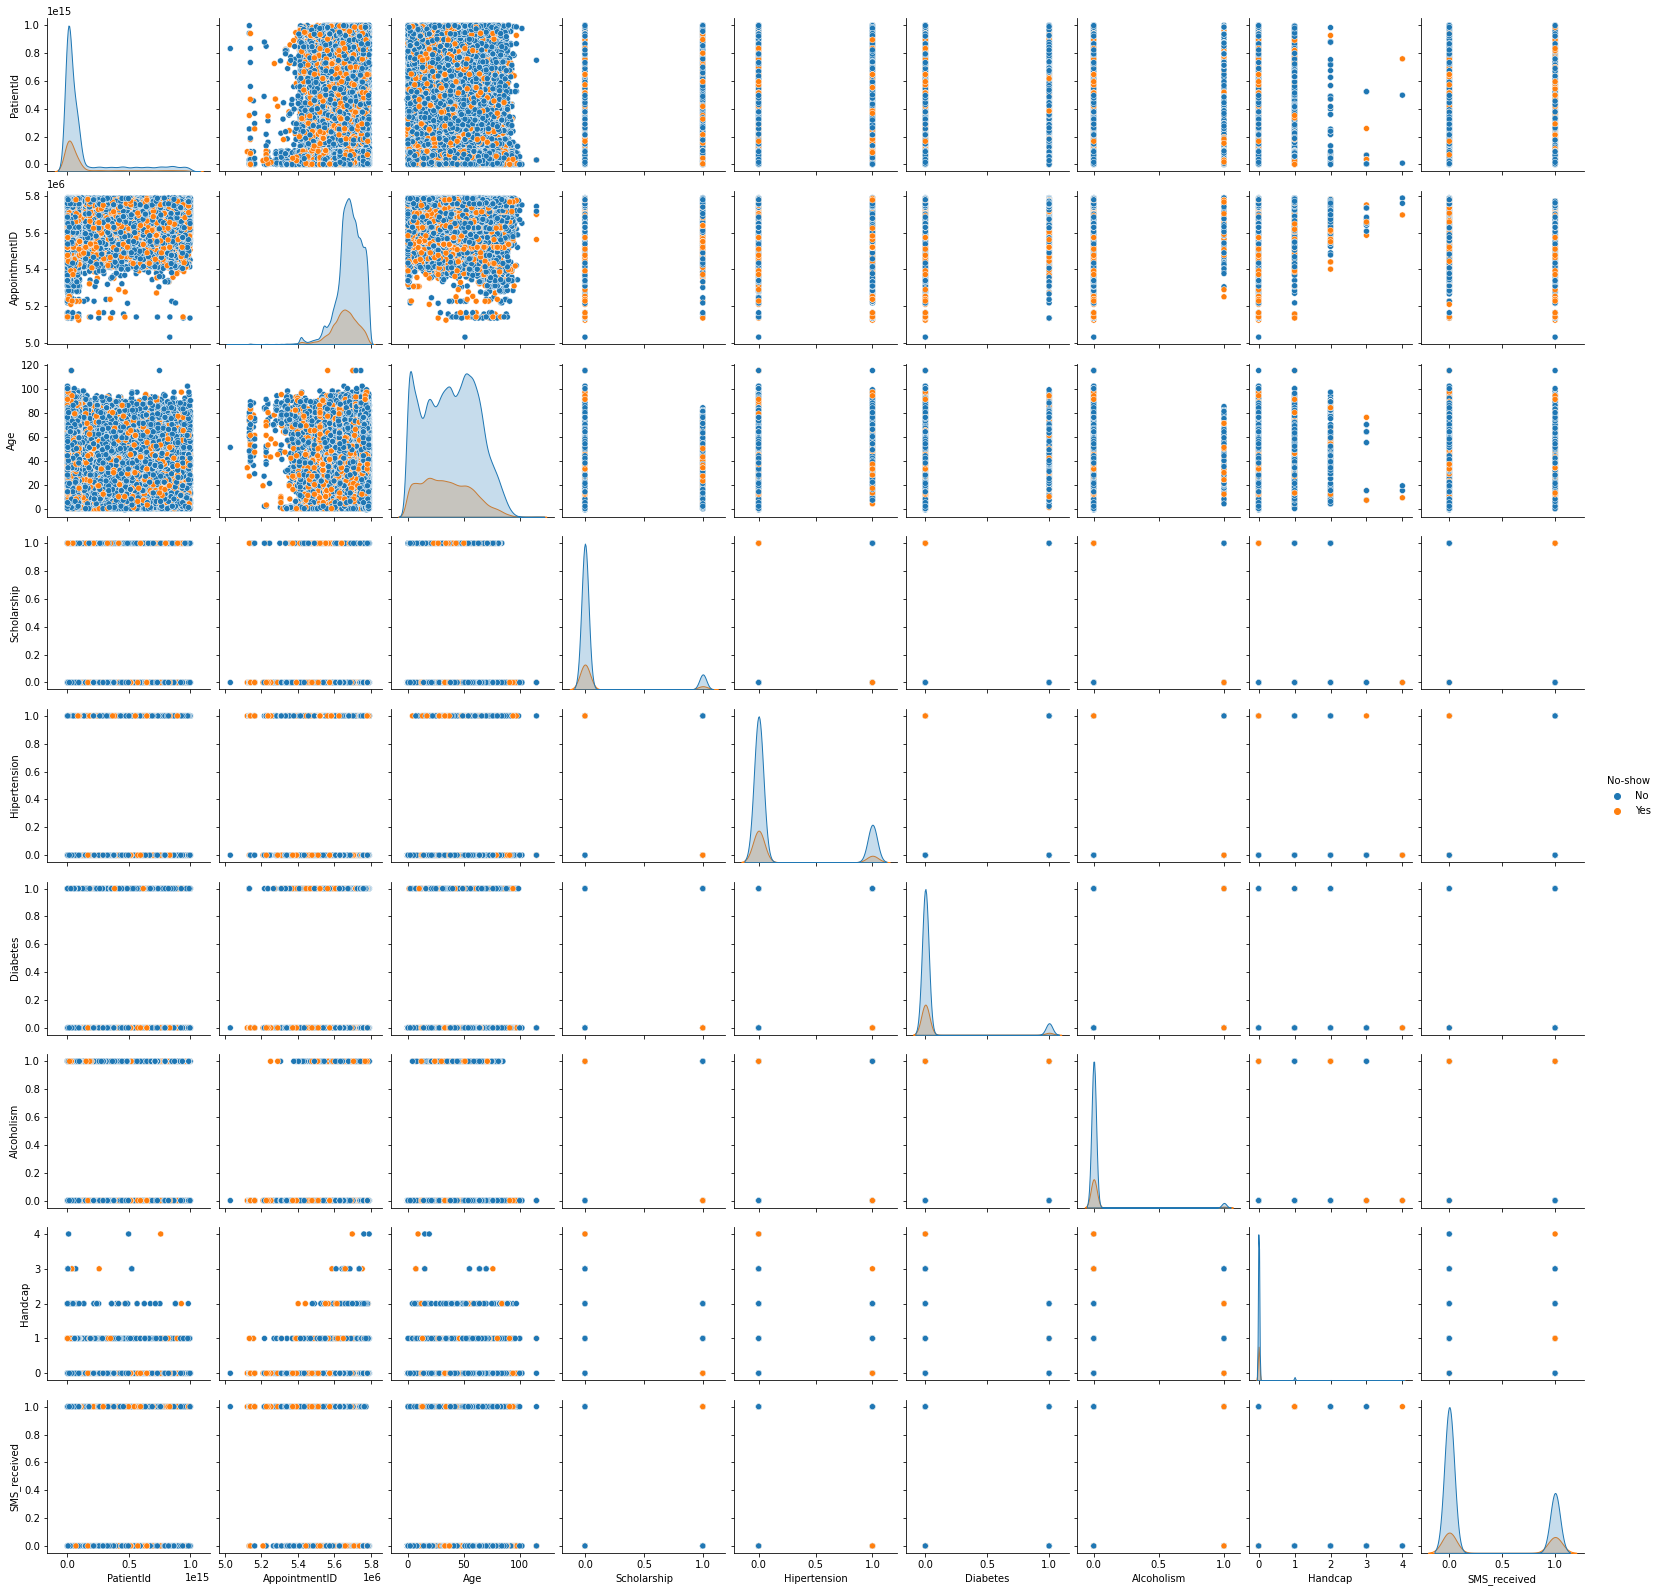

In [23]:
import seaborn as sns
sns.pairplot(data=df, hue = 'No-show')

In [24]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [151]:
df['Age']=df['Age'].replace(-1,0)

In [152]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,date_diff
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702
std,2.560949e+14,7.129575e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


In [153]:
df['No-show']=df['No-show'].map({'No' : 0, 'Yes' : 1})

In [154]:
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date_diff
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 23:59:59,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 23:59:59,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 23:59:59,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 23:59:59,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 23:59:59,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29 23:59:59,76,REPÚBLICA,0,1,0,0,0,0,0,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29 23:59:59,23,GOIABEIRAS,0,0,0,0,0,0,1,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29 23:59:59,39,GOIABEIRAS,0,0,0,0,0,0,1,1
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29 23:59:59,21,ANDORINHAS,0,0,0,0,0,0,0,-1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29 23:59:59,19,CONQUISTA,0,0,0,0,0,0,0,1


In [155]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])


In [156]:
df['Neighbourhood']=le.fit_transform(df['Neighbourhood'])

In [157]:
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,date_diff
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29 23:59:59,62,39,0,1,0,0,0,0,0,-1
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29 23:59:59,56,39,0,0,0,0,0,0,0,-1
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29 23:59:59,62,45,0,0,0,0,0,0,0,-1
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29 23:59:59,8,54,0,0,0,0,0,0,0,-1
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29 23:59:59,56,39,0,1,1,0,0,0,0,-1
5,9.598513e+13,5626772,0,2016-04-27 08:36:51,2016-04-29 23:59:59,76,58,0,1,0,0,0,0,0,1
6,7.336882e+14,5630279,0,2016-04-27 15:05:12,2016-04-29 23:59:59,23,25,0,0,0,0,0,0,1,1
7,3.449833e+12,5630575,0,2016-04-27 15:39:58,2016-04-29 23:59:59,39,25,0,0,0,0,0,0,1,1
8,5.639473e+13,5638447,0,2016-04-29 08:02:16,2016-04-29 23:59:59,21,1,0,0,0,0,0,0,0,-1
9,7.812456e+13,5629123,0,2016-04-27 12:48:25,2016-04-29 23:59:59,19,12,0,0,0,0,0,0,0,1


In [178]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
X=df.drop(labels=['PatientId','ScheduledDay','AppointmentDay', 'AppointmentID','No-show'],axis=1)
y=df['No-show']

In [162]:
X.dtypes

Gender           int32
Age              int64
Neighbourhood    int32
Scholarship      int64
Hipertension     int64
Diabetes         int64
Alcoholism       int64
Handcap          int64
SMS_received     int64
date_diff        int64
dtype: object

In [163]:
from sklearn.preprocessing import StandardScaler
scaled_X=StandardScaler().fit_transform(X)
scaled_X

array([[-0.73383659,  1.07793269, -0.12241048, ..., -0.13772244,
        -0.68761155, -0.66756803],
       [ 1.36270119,  0.81830578, -0.12241048, ..., -0.13772244,
        -0.68761155, -0.66756803],
       [-0.73383659,  1.07793269,  0.14590744, ..., -0.13772244,
        -0.68761155, -0.66756803],
       ...,
       [-0.73383659, -0.69618449,  0.05646814, ..., -0.13772244,
         1.45430948,  2.02008819],
       [-0.73383659,  0.03942507,  0.05646814, ..., -0.13772244,
         1.45430948,  2.02008819],
       [-0.73383659,  0.73176348,  0.05646814, ..., -0.13772244,
         1.45430948,  2.02008819]])

In [164]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(scaled_X,y, test_size=0.2,random_state=40)

In [165]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,max_depth=5)
rf_model.fit(X_train,y_train)


RandomForestClassifier(max_depth=5)

### Model Testing

#### Training data

In [166]:
y_train_pred = rf_model.predict(X_train) #Trained question paper

#### Test data

In [167]:
y_test_pred = rf_model.predict(X_test) #New question

### Model Evaluation

In [168]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

#### Training data

In [169]:
accuracy_score(y_train,y_train_pred)

0.7985659515273521

In [170]:
confusion_matrix(y_train,y_train_pred)

array([[70610,     0],
       [17811,     0]], dtype=int64)

In [179]:
precision_score(y_train,y_train_pred,average='weighted')

0.6377075789387853

In [180]:
recall_score(y_train,y_train_pred,average='weighted')

0.7985659515273521

In [181]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     70610
           1       0.00      0.00      0.00     17811

    accuracy                           0.80     88421
   macro avg       0.40      0.50      0.44     88421
weighted avg       0.64      0.80      0.71     88421



#### Test data

In [182]:
accuracy_score(y_test,y_test_pred)

0.7960734642178594

In [183]:
confusion_matrix(y_test,y_test_pred)

array([[17598,     0],
       [ 4508,     0]], dtype=int64)

In [184]:
precision_score(y_test,y_test_pred,average='weighted')

0.6337329604318235

In [185]:
recall_score(y_test,y_test_pred,average='weighted')

0.7960734642178594

In [188]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     70610
           1       0.00      0.00      0.00     17811

    accuracy                           0.80     88421
   macro avg       0.40      0.50      0.44     88421
weighted avg       0.64      0.80      0.71     88421



### GridSearch CV

In [212]:
from sklearn.model_selection import GridSearchCV

In [213]:
grid_search = GridSearchCV(estimator=rf_model,param_grid = {'max_depth': [4,5,6,7,8],'criterion':['gini','entropy']},cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8]})

In [214]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [215]:
grid_search.best_score_

0.7988826159773978

### K-Fold CV

In [216]:
from sklearn.model_selection import cross_val_score,KFold #Explore Kfold
cv_scores = cross_val_score(estimator = rf_model,X = X,y=y,cv=5)
print('5 Fold CV Scores : ',cv_scores)
print('Mean Accuracy    : ',round(cv_scores.mean(),4))
print('STD Deviation    : ',round(cv_scores.std(),4))

5 Fold CV Scores :  [0.79806387 0.79806387 0.79809998 0.79805474 0.79805474]
Mean Accuracy    :  0.7981
STD Deviation    :  0.0


In [190]:
!pip install xgboost

In [189]:
!pip install lightgbm

In [191]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

import xgboost as xgb
import lightgbm as lgb

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [192]:
adb_classifier     = AdaBoostClassifier()
gb_classifer       = GradientBoostingClassifier()
xgboost_classifier = XGBClassifier()
lgb_classifier     = LGBMClassifier()

In [220]:
%%time
adb_classifier.fit(X_train,y_train)

Wall time: 4.3 s


AdaBoostClassifier()

In [194]:
%%time
gb_classifer.fit(X_train,y_train)

Wall time: 14.3 s


GradientBoostingClassifier()

In [195]:
%%time
xgboost_classifier.fit(X_train,y_train)

Wall time: 7.58 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [196]:
%%time
lgb_classifier.fit(X_train,y_train)

Wall time: 1.57 s


LGBMClassifier()

### Model Testing

In [224]:
#Training accuracy
y_train_pred_adb = adb_classifier.predict(X_train)
y_train_pred_gb  = gb_classifer.predict(X_train)
y_train_pred_xgb = xgboost_classifier.predict(X_train)
y_train_pred_lgb = lgb_classifier.predict(X_train)

In [200]:
#Testing Accuracy
y_test_pred_adb = adb_classifier.predict(X_test)
y_test_pred_gb  = gb_classifer.predict(X_test)
y_test_pred_xgb = xgboost_classifier.predict(X_test)
y_test_pred_lgb = lgb_classifier.predict(X_test)

### AdaBoost Metrics

In [208]:
print('AdaBoost Accuracy  : ',accuracy_score(y_test,y_test_pred_adb))
print('AdaBoost Precision : ',precision_score(y_test,y_test_pred_adb))
print('AdaBoost Recall    : ', recall_score(y_test,y_test_pred_adb))
print('f1 score           : ',f1_score(y_test,y_test_pred_adb))

AdaBoost Accuracy  :  0.7958472812811002
AdaBoost Precision :  0.45098039215686275
AdaBoost Recall    :  0.00510204081632653
f1 score           :  0.010089932002632156


### Gradient Boosting

In [209]:
print('Gradient Boost Accuracy  : ',accuracy_score(y_test,y_test_pred_gb))
print('Gradient Precision       : ',precision_score(y_test,y_test_pred_gb))
print('Gradient Recall          : ', recall_score(y_test,y_test_pred_gb))
print('f1 score                 : ',f1_score(y_test,y_test_pred_gb))

Gradient Boost Accuracy  :  0.7959829910431557
Gradient Precision       :  0.47619047619047616
Gradient Recall          :  0.0044365572315882874
f1 score                 :  0.00879120879120879


### Xtreme GB

In [210]:
print('XGBM Boost Accuracy  : ',accuracy_score(y_test,y_test_pred_xgb))
print('XGBM Precision       : ',precision_score(y_test,y_test_pred_xgb))
print('XGBM Recall          : ', recall_score(y_test,y_test_pred_xgb))
print('f1 score             : ',f1_score(y_test,y_test_pred_xgb))

XGBM Boost Accuracy  :  0.7967520130281371
XGBM Precision       :  0.5154004106776181
XGBM Recall          :  0.05567879325643301
f1 score             :  0.10050050050050051


### Light GBM

In [211]:
print('LGBM Boost Accuracy  : ',accuracy_score(y_test,y_test_pred_lgb))
print('LGBM Precision       : ',precision_score(y_test,y_test_pred_lgb))
print('LGBM Recall          : ', recall_score(y_test,y_test_pred_lgb))
print('f1 score             : ',f1_score(y_test,y_test_pred_lgb))

LGBM Boost Accuracy  :  0.7970686691396001
LGBM Precision       :  0.582089552238806
LGBM Recall          :  0.01730257320319432
f1 score             :  0.03360620422231797


## XGBoost Classifier
https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

## AdaBoost Classifier
https://www.datacamp.com/tutorial/adaboost-classifier-python

## Label Encoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

## Get Dummies
https://dataindependent.com/pandas/pandas-get-dummies-pd-get_dummies/

## SMOTE - to balance the data
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

## Applying Lambda functions to Pandas Dataframe

https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/

## Python - Slicing Strings
https://www.w3schools.com/python/python_strings_slicing.asp

## Correlation between Categorical Variables
https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7